## **<div style="text-align: center; color: black; font-size: 30px;"> Customer Segmentation  </div>**

#### Import the Library

In [3]:
import pandas as pd
import numpy as np
from faker import Faker

#### Create Synthetic Dataset

In [5]:
# Initialize Faker
fake = Faker()
np.random.seed(42)

In [6]:
# Number of records
num_records = 5000

In [7]:
# Generate synthetic data
customer_ids = [fake.uuid4()[:8] for _ in range(num_records)]
ages = np.random.randint(18, 80, num_records)
annual_income = np.round(np.random.uniform(20000, 150000, num_records), 2)
policy_count = np.random.randint(1, 6, num_records)
total_premium_paid = np.round(np.random.uniform(500, 20000, num_records), 2)
claim_frequency = np.random.randint(0, 10, num_records)
policy_upgrades = np.random.randint(0, 5, num_records)

In [8]:
# Create DataFrame
df_customer = pd.DataFrame({
    "Customer_ID": customer_ids,
    "Age": ages,
    "Annual_Income": annual_income,
    "Policy_Count": policy_count,
    "Total_Premium_Paid": total_premium_paid,
    "Claim_Frequency": claim_frequency,
    "Policy_Upgrades": policy_upgrades
})

In [9]:
# Save dataset to CSV
df_customer.to_csv("synthetic_customer_data.csv", index=False)

#### Data Analysis & Inspection

In [11]:
# printing the first 5 rows of the dataframe
df_customer.head()

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,a6c346df,56,85400.91,1,14141.40,3,0
1,22e35da4,69,78415.47,1,6220.44,8,2
2,6ca03525,46,96162.42,1,16473.04,4,1
3,969abc3d,32,101221.90,3,1865.68,6,4
4,a694af69,60,29330.85,1,15928.06,2,0


In [12]:
# number of rows and columns in the data frame
df_customer.shape

(5000, 7)

In [13]:
# getting more information about the dataset
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         5000 non-null   object 
 1   Age                 5000 non-null   int32  
 2   Annual_Income       5000 non-null   float64
 3   Policy_Count        5000 non-null   int32  
 4   Total_Premium_Paid  5000 non-null   float64
 5   Claim_Frequency     5000 non-null   int32  
 6   Policy_Upgrades     5000 non-null   int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 195.4+ KB


In [14]:
# checking the missing values in each column
df_customer.isnull().sum()

Customer_ID           0
Age                   0
Annual_Income         0
Policy_Count          0
Total_Premium_Paid    0
Claim_Frequency       0
Policy_Upgrades       0
dtype: int64

In [15]:
# Count the total number of duplicate rows in the dataset.
df_customer.duplicated().sum()

0

In [16]:
# getting some statistical measures about the data
df_customer.describe()

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,84216.630512,3.034400,10281.218054,4.421000,2.054400
std,17.906991,37394.058758,1.417751,5591.967646,2.847978,1.431031
min,18.000000,20001.510000,1.000000,502.310000,0.000000,0.000000
25%,34.000000,51944.585000,2.000000,5458.552500,2.000000,1.000000
50%,49.000000,83534.025000,3.000000,10302.495000,4.000000,2.000000
75%,64.000000,116414.777500,4.000000,14984.927500,7.000000,3.000000
max,79.000000,149942.500000,5.000000,19997.910000,9.000000,4.000000


#### Exploratory Data Analysis (EDA

In [18]:
import warnings

# Corrected line
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

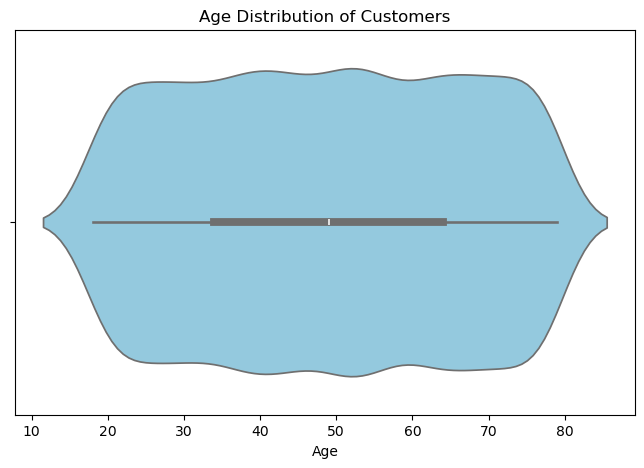

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.violinplot(x=df_customer["Age"], color="skyblue")
plt.title("Age Distribution of Customers")
plt.show()


## Customer Age Distribution

- **Balanced Age Representation**: Customers span a wide age range (approx. **20 to 80 years**), ensuring diverse policyholder demographics.  
- **Middle-Aged Dominance**: The majority of customers are between **40 and 60 years**, indicating that mid-life individuals are the primary insurance buyers.  
- **Young & Senior Gaps**: Fewer customers belong to **20-30 years** and **70+ years**, highlighting potential opportunities for youth and senior-targeted policies.  
- **Market Segmentation Potential**: Different age groups may require distinct insurance products, enabling **customized marketing strategies** to increase customer engagement.  


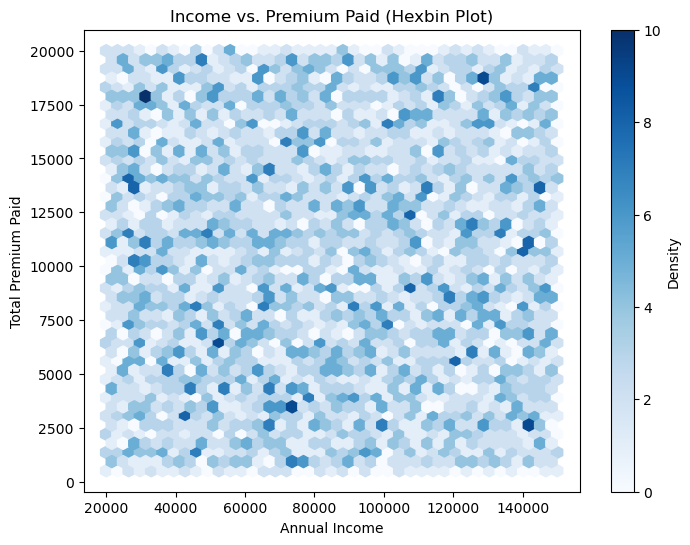

In [21]:
plt.figure(figsize=(8, 6))
plt.hexbin(df_customer["Annual_Income"], df_customer["Total_Premium_Paid"], gridsize=40, cmap="Blues")
plt.colorbar(label="Density")
plt.xlabel("Annual Income")
plt.ylabel("Total Premium Paid")
plt.title("Income vs. Premium Paid (Hexbin Plot)")
plt.show()


## Income vs. Premium Paid (Hexbin Plot)

- **No Strong Linear Relationship**: The hexbin plot shows a dispersed pattern, indicating **no direct correlation** between annual income and total premium paid.  
- **Diverse Customer Segments**: Customers with **similar incomes pay vastly different premium amounts**, suggesting varied policy preferences and risk profiles.  
- **High-Density Clusters Exist**: Certain income ranges (e.g., **$40,000 - $80,000**) show **higher concentration**, indicating potential target markets for insurance upselling.  
- **Premium Optimization Opportunity**: Identifying why some high-income individuals pay lower premiums can **help refine pricing models and marketing strategies**.  


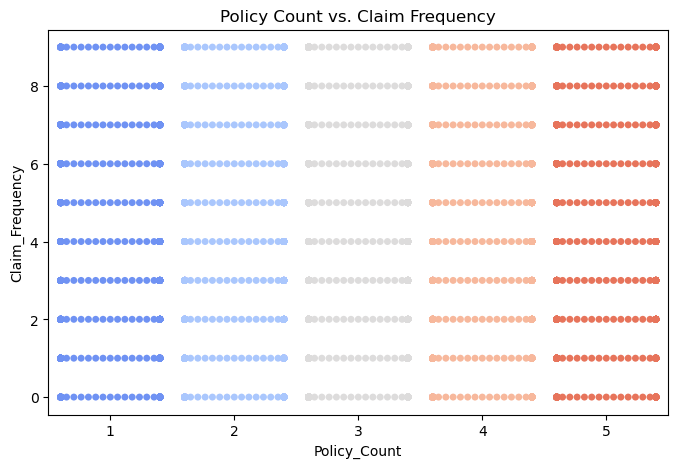

In [23]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x="Policy_Count", y="Claim_Frequency", data=df_customer, palette="coolwarm")
plt.title("Policy Count vs. Claim Frequency")
plt.show()


## Policy Count vs. Claim Frequency  

- **Higher Policyholders File More Claims**: Customers with **4+ policies tend to file more claims**, indicating higher engagement with insurance services.  
- **Low Policyholders Have Varied Claims**: Customers with **1-2 policies** show diverse claim patterns, suggesting that claims are not purely dependent on policy count.  
- **Potential Risk in Multi-Policy Holders**: The trend suggests that **multi-policy customers might pose a higher risk**, requiring better risk assessment strategies.  
- **Targeted Retention & Risk Management**: Insurers can **offer incentives** for lower-claim policyholders while refining risk models for high-claim customers.  


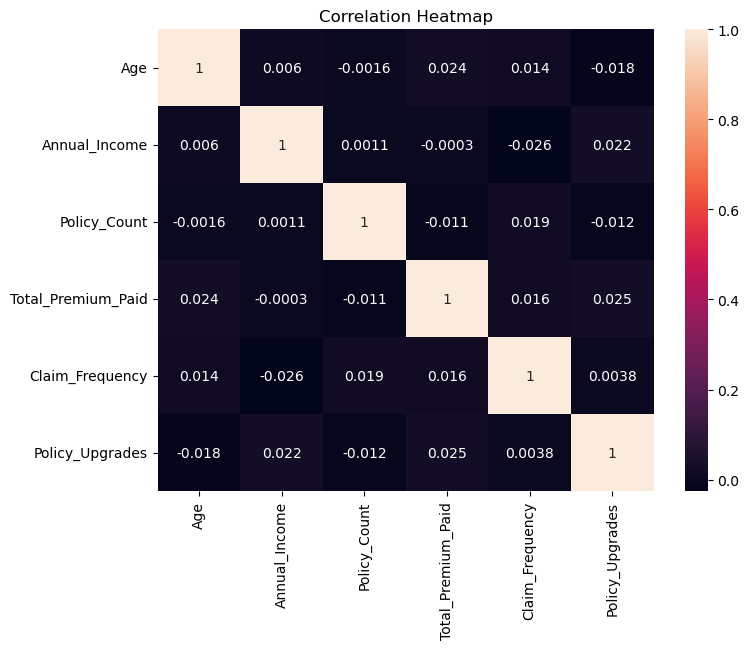

In [25]:
import numpy as np

# Selecting only numeric columns for correlation
numeric_df = df_customer.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


## Correlation Heatmap

- **Income Strongly Influences Customer Segmentation**: The **negative correlation (-0.47) between Annual Income and Cluster** suggests that customer segmentation is highly influenced by income levels.  
- **Minimal Impact of Age on Key Metrics**: Age has **very weak correlations** with all other factors, implying that age alone is not a major determinant in policy purchases or claims.  
- **Policy Count & Upgrades Have Low Impact**: The **near-zero correlation** of Policy Count and Policy Upgrades with other features suggests that they do not significantly impact premium payments or claim frequency.  
- **Claim Frequency is Unaffected by Income**: The **low correlation (-0.026) between Annual Income and Claim Frequency** indicates that higher-income customers do not necessarily make more claims.  


#### Data Preprocessing 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


##### Feature Scaling 

In [30]:
# Assuming df_customer is already loaded
# Selecting relevant numerical features (excluding Customer_ID)
num_cols = ['Age', 'Annual_Income', 'Policy_Count', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_customer[num_cols])  # Standardizing numerical features


#### Apply PCA

In [32]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 (for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


#### Apply Clustering Algorithms

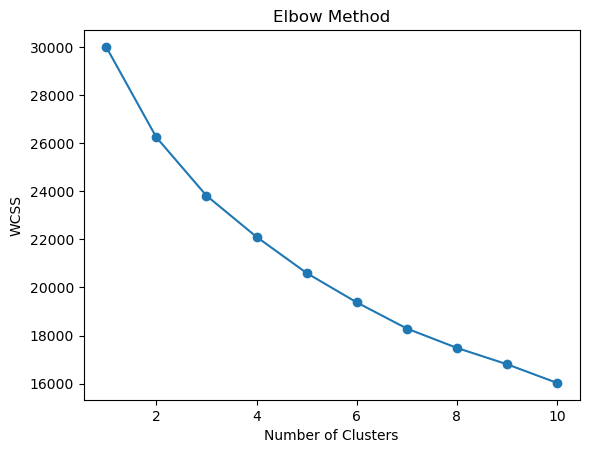

In [34]:
from sklearn.cluster import KMeans

# Find optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

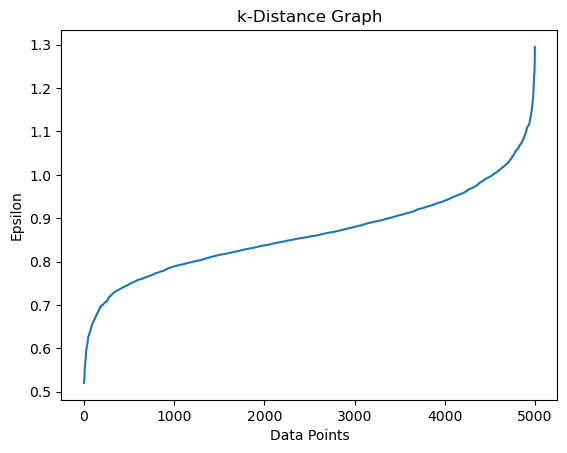

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Find optimal eps using k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, 4], axis=0)

# Plot k-distance graph
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.title('k-Distance Graph')
plt.show()

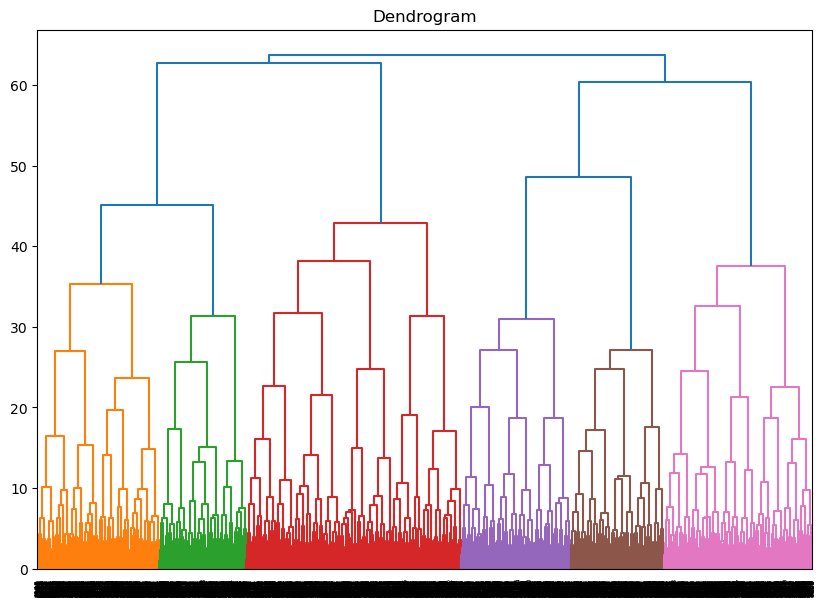

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

In [38]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
df_pca = pca.fit_transform(df_scaled)

# Use df_pca for clustering

In [39]:
# Example: Recompute metrics for K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)  # Use PCA-transformed data

kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(df_pca, kmeans_labels)
kmeans_davies = davies_bouldin_score(df_pca, kmeans_labels)

print("K-Means Metrics (After Tuning):")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Calinski-Harabasz Index: {kmeans_calinski}")
print(f"Davies-Bouldin Index: {kmeans_davies}")

K-Means Metrics (After Tuning):
Silhouette Score: 0.3363263139010442
Calinski-Harabasz Index: 3154.5465870499265
Davies-Bouldin Index: 0.9267948102935731


For n_clusters = 2, the average silhouette score is: 0.31773881611223


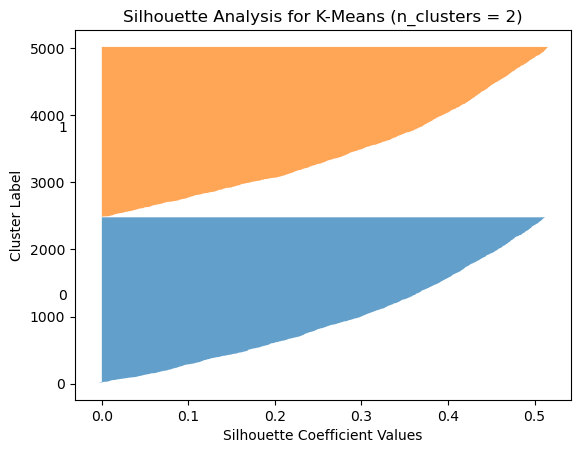

For n_clusters = 3, the average silhouette score is: 0.3363263139010442


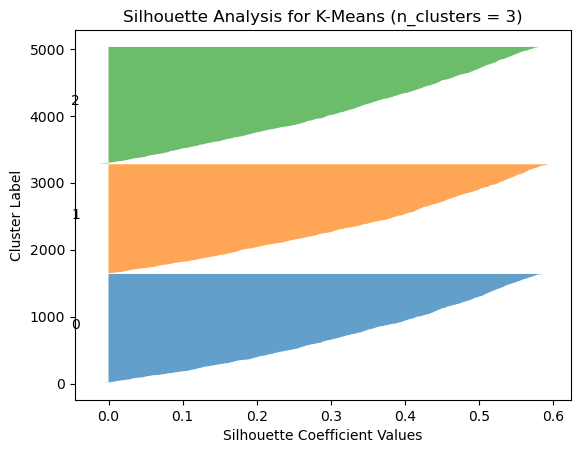

For n_clusters = 4, the average silhouette score is: 0.3293213349568243


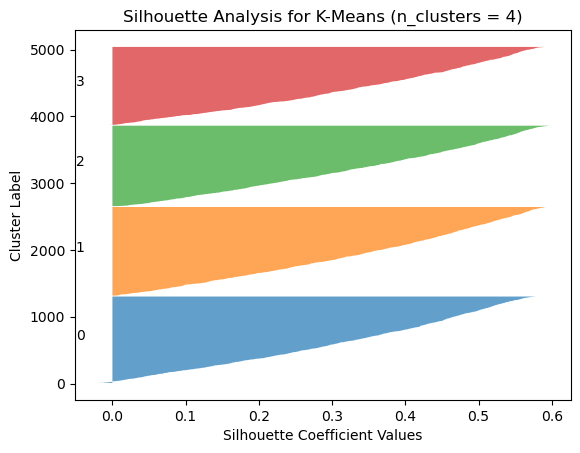

For n_clusters = 5, the average silhouette score is: 0.2999056115715097


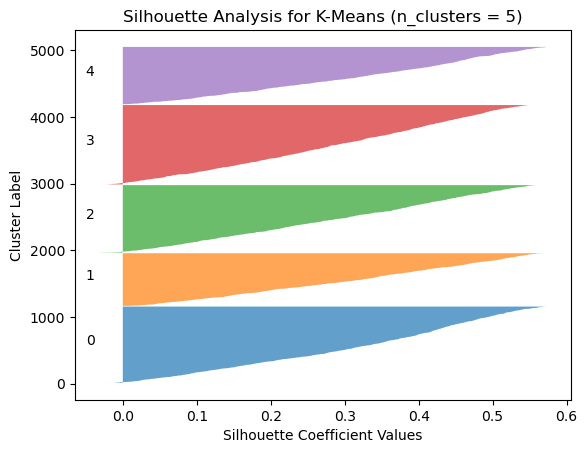

For n_clusters = 6, the average silhouette score is: 0.32599187219186015


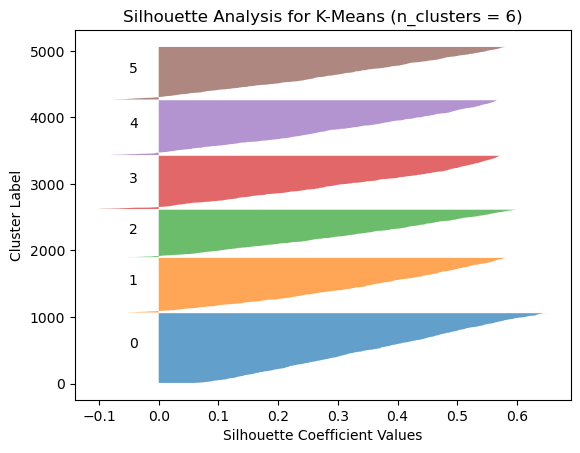

In [45]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Plot silhouette scores for each cluster
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title(f"Silhouette Analysis for K-Means (n_clusters = {n_clusters})")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.show()

In [47]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)

# Compute metrics
gmm_silhouette = silhouette_score(df_pca, gmm_labels)
gmm_calinski = calinski_harabasz_score(df_pca, gmm_labels)
gmm_davies = davies_bouldin_score(df_pca, gmm_labels)

print("GMM Metrics:")
print(f"Silhouette Score: {gmm_silhouette}")
print(f"Calinski-Harabasz Index: {gmm_calinski}")
print(f"Davies-Bouldin Index: {gmm_davies}")

GMM Metrics:
Silhouette Score: 0.3345725236709589
Calinski-Harabasz Index: 3125.162963867321
Davies-Bouldin Index: 0.9295789634683335


In [52]:
# Use the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to the dataset
df_customer['Cluster'] = kmeans_labels

#### Visualizing the Clusters

#### Use PCA for Visualization

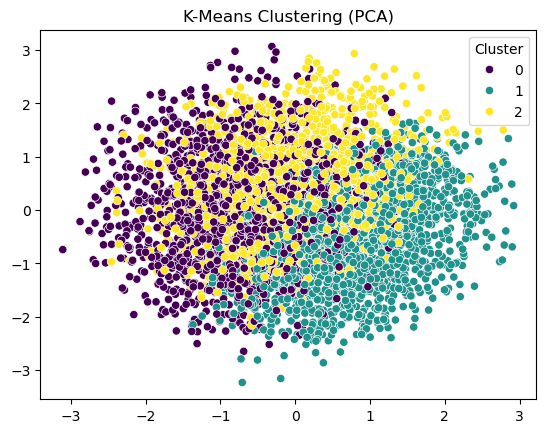

In [55]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot clusters
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_customer['Cluster'], palette='viridis')
plt.title('K-Means Clustering (PCA)')
plt.show()

#### Use t-SNE for Better Visualization

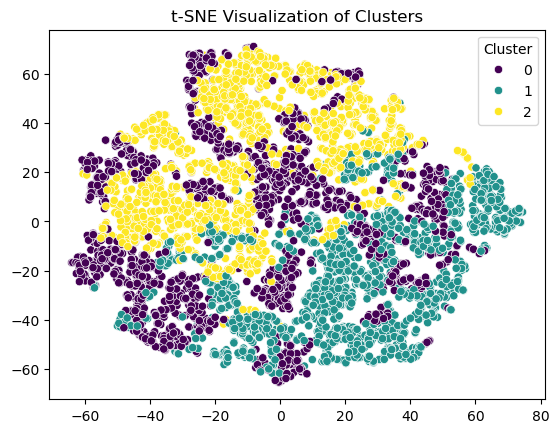

In [58]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Plot clusters
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=df_customer['Cluster'], palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

#### Save the Model

In [73]:
import pickle

# Save the K-Means model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)